In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


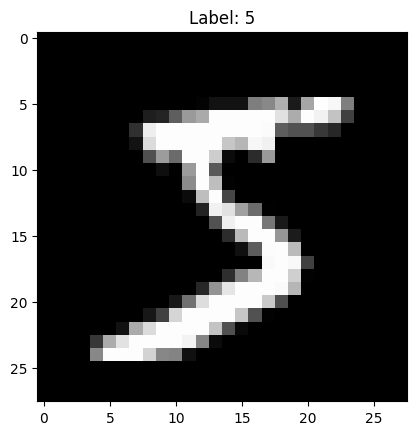

In [21]:
# Load the dataset (already split into train/test sets)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Test data shape:", x_test.shape)      # (10000, 28, 28)

# Show a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [22]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [23]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    LeakyReLU(alpha=0.1),                # LeakyReLU as a separate layer
    Dense(10, activation='softmax')      # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [27]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9956 - loss: 0.0158 - val_accuracy: 0.9747 - val_loss: 0.0956
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.9762 - val_loss: 0.0982
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9973 - loss: 0.0100 - val_accuracy: 0.9747 - val_loss: 0.1016
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9977 - loss: 0.0087 - val_accuracy: 0.9756 - val_loss: 0.0969
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9984 - loss: 0.0074 - val_accuracy: 0.9738 - val_loss: 0.1219


In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9737


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


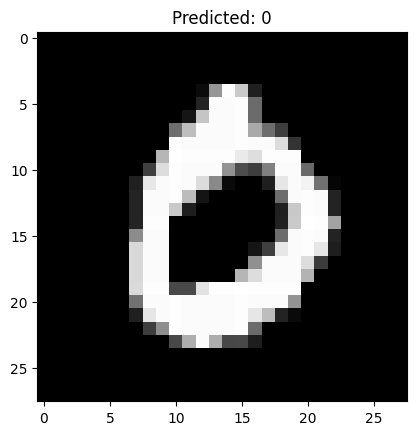

In [39]:
predictions = model.predict(x_test)

# Show prediction for the first test image
plt.imshow(x_test[3], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[3])}")
plt.show()


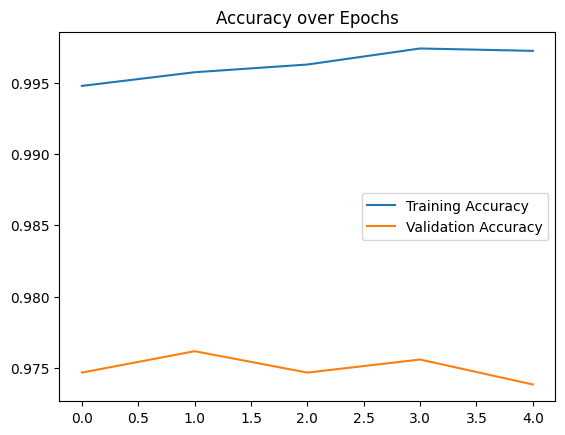